In [24]:
import nibabel as nb
import numpy as np
import scipy
from scipy import stats
import math
import pandas as pd
import statsmodels.api as sm
from ipynb.fs.full.utils import *

In [25]:
eye_data = scipy.io.loadmat('E:/FPP_files_and_codes/FPP_files/eye_movment_data/final162.mat')['final162']

In [26]:
eye_data = eye_data.squeeze(0)

In [27]:
eye_data.shape

(3655,)

In [28]:
shift = 4
eye_regressor_shifted = np.roll(eye_data, shift)

In [29]:
left_data = scipy.io.loadmat('E:/FPP_files_and_codes/FPP_files/Movie_watching_avg_data/notmean_left_Meanfile.mat')['Left_data']
right_data = scipy.io.loadmat('E:/FPP_files_and_codes/FPP_files/Movie_watching_avg_data/notmean_right_Meanfile.mat')['Right_data']

In [30]:
def min_max_normalize(arr):
    arr_min = np.min(arr)
    arr_max = np.max(arr)
    
    normalized_arr = (arr - arr_min) / (arr_max - arr_min)
    return normalized_arr

In [31]:
eye_regressor_shifted_normalized = min_max_normalize(eye_regressor_shifted)

In [32]:
eye_regressor_shifted_normalized_2d = eye_regressor_shifted_normalized.reshape(1, -1)

X = eye_regressor_shifted_normalized_2d.T

coefficients_regressor_eye_data_right = np.zeros(32492)

pvalue_coefficients_regressor_eye_data_right = np.zeros(32492)


zero = np.zeros(3655)

for (i,vertex_data) in enumerate(right_data):
    y = vertex_data
    df = pd.DataFrame(X, columns=['X1'])
    df['y'] = y

    X = sm.add_constant(df[['X1']])
    model = sm.GLM(df['y'], X, family=sm.families.Gaussian())

    if not np.array_equal(vertex_data, zero):
        result = model.fit()
        coefficients = result.params

        coefficients_regressor_eye_data_right[i] = coefficients['X1']
        
        p_values = result.pvalues
        pvalue_coefficients_regressor_eye_data_right[i] = p_values['X1']

In [33]:
making_beta_and_sig_map_right(coefficients_regressor_eye_data_right, pvalue_coefficients_regressor_eye_data_right,\
                              'E:/FPP_files_and_codes/FPP_files/figure6_final_maps/beta_regressor_eyemovment_shift4_with_constant.R.func.gii',\
                               'E:/FPP_files_and_codes/FPP_files/figure6_final_maps/significance_beta_regressor_eyemovment_shift4_with_constant.R.func.gii' )

e:\FPP_files_and_codes\FPP_codebase\Figure6_analysis\Final_analysis\utils.ipynb:18: RuntimeWarning: divide by zero encountered in log
  "outputs": [],
e:\FPP_files_and_codes\FPP_codebase\Figure6_analysis\Final_analysis\utils.ipynb:18: RuntimeWarning: invalid value encountered in multiply
  "outputs": [],


In [34]:
eye_regressor_shifted_normalized_2d = eye_regressor_shifted_normalized.reshape(1, -1)

X = eye_regressor_shifted_normalized_2d.T

coefficients_regressor_eye_data_left = np.zeros(32492)

pvalue_coefficients_regressor_eye_data_left = np.zeros(32492)


zero = np.zeros(3655)

for (i,vertex_data) in enumerate(left_data):
    y = vertex_data
    df = pd.DataFrame(X, columns=['X1'])
    df['y'] = y

    X = sm.add_constant(df[['X1']])
    model = sm.GLM(df['y'], X, family=sm.families.Gaussian())

    if not np.array_equal(vertex_data, zero):
        result = model.fit()
        coefficients = result.params

        coefficients_regressor_eye_data_left[i] = coefficients['X1']
        
        p_values = result.pvalues
        pvalue_coefficients_regressor_eye_data_left[i] = p_values['X1']

In [35]:
making_beta_and_sig_map_left(coefficients_regressor_eye_data_left, pvalue_coefficients_regressor_eye_data_left,\
                              'E:/FPP_files_and_codes/FPP_files/figure6_final_maps/beta_regressor_eyemovment_shift4_with_constant.L.func.gii',\
                               'E:/FPP_files_and_codes/FPP_files/figure6_final_maps/significance_beta_regressor_eyemovment_shift4_with_constant.L.func.gii' )

e:\FPP_files_and_codes\FPP_codebase\Figure6_analysis\Final_analysis\utils.ipynb:33: RuntimeWarning: divide by zero encountered in log
  "    temp_r.darrays[0].data = float32_significance_beta\n",
e:\FPP_files_and_codes\FPP_codebase\Figure6_analysis\Final_analysis\utils.ipynb:33: RuntimeWarning: invalid value encountered in multiply
  "    temp_r.darrays[0].data = float32_significance_beta\n",


In [37]:
significance_beta_eyedata_right = -1* np.log(pvalue_coefficients_regressor_eye_data_right) * np.sign(coefficients_regressor_eye_data_right)
significance_beta_eyedata_left = -1* np.log(pvalue_coefficients_regressor_eye_data_left) * np.sign(coefficients_regressor_eye_data_left)

C:\Users\roza\AppData\Local\Temp\ipykernel_11416\256085704.py:1: RuntimeWarning: divide by zero encountered in log
  significance_beta_eyedata_right = -1* np.log(pvalue_coefficients_regressor_eye_data_right) * np.sign(coefficients_regressor_eye_data_right)
C:\Users\roza\AppData\Local\Temp\ipykernel_11416\256085704.py:1: RuntimeWarning: invalid value encountered in multiply
  significance_beta_eyedata_right = -1* np.log(pvalue_coefficients_regressor_eye_data_right) * np.sign(coefficients_regressor_eye_data_right)
C:\Users\roza\AppData\Local\Temp\ipykernel_11416\256085704.py:2: RuntimeWarning: divide by zero encountered in log
  significance_beta_eyedata_left = -1* np.log(pvalue_coefficients_regressor_eye_data_left) * np.sign(coefficients_regressor_eye_data_left)
C:\Users\roza\AppData\Local\Temp\ipykernel_11416\256085704.py:2: RuntimeWarning: invalid value encountered in multiply
  significance_beta_eyedata_left = -1* np.log(pvalue_coefficients_regressor_eye_data_left) * np.sign(coeffici

# Beta values for FPPs

In [12]:
mean_FPPs_activity = mean_FPPs_movie_data()

In [13]:
mean_FPPs_activity.shape

(5, 3655)

In [14]:
eye_regressor_shifted_normalized_2d = eye_regressor_shifted_normalized.reshape(1, -1)

X = eye_regressor_shifted_normalized_2d.T

coefficients_regressor_eye_data_FPPs = np.zeros(5)

pvalue_coefficients_regressor_eye_data_FPPs = np.zeros(5)

stderr_coefficients_regressor_eye_data_FPPs = np.zeros(5)

zero = np.zeros(3655)

for (i,vertex_data) in enumerate(mean_FPPs_activity):
    y = vertex_data
    df = pd.DataFrame(X, columns=['X1'])
    df['y'] = y

    X = sm.add_constant(df[['X1']])
    model = sm.GLM(df['y'], X, family=sm.families.Gaussian())

    if not np.array_equal(vertex_data, zero):
        result = model.fit()
        coefficients = result.params

        coefficients_regressor_eye_data_FPPs[i] = coefficients['X1']
        
        p_values = result.pvalues
        pvalue_coefficients_regressor_eye_data_FPPs[i] = p_values['X1']
        
        standard_errors = result.bse
        stderr_coefficients_regressor_eye_data_FPPs[i] = standard_errors['X1']

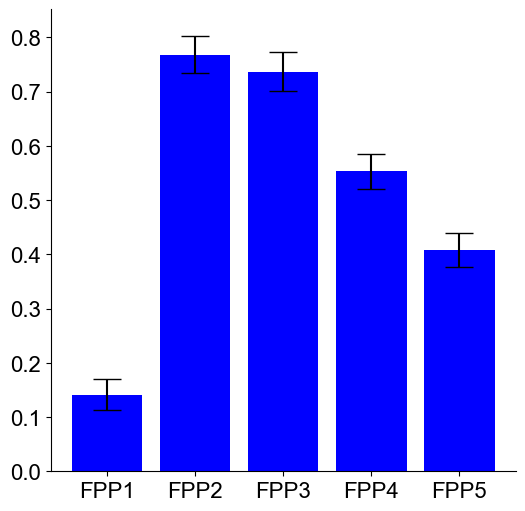

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 6))

plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'Arial'
ax.bar(np.arange(coefficients_regressor_eye_data_FPPs.shape[0]), coefficients_regressor_eye_data_FPPs, yerr=stderr_coefficients_regressor_eye_data_FPPs, capsize=10, color='blue')
plt.xticks(np.arange(5), ['FPP1', 'FPP2', 'FPP3', 'FPP4', 'FPP5'])
max_value = (coefficients_regressor_eye_data_FPPs + stderr_coefficients_regressor_eye_data_FPPs).max()
ax.set_ylim(0, max_value + 0.05) 
# ax.set_ylabel('Regression coefficient',  labelpad=10)

# plt.title('FPPs Beta eye movment regressor')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('E:/FPP_files_and_codes/Figures/Figure6_files/panel_A/cofficients_regressor_eye_movment', dpi=1200, bbox_inches='tight')



In [25]:
coefficients_regressor_eye_data_FPPs

array([0.14097324, 0.76817464, 0.73694058, 0.55331889, 0.40834461])